In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf

In [9]:
df = pd.read_csv('drone_dataset_2.csv')
df

,lat,lng,altitude,tower_distance,signal_strength
0,23.748915,90.370260,40,1,-51.029454
1,23.748920,90.370344,40,1,-52.125803
2,23.748912,90.370355,40,1,-49.927008
3,23.748905,90.370310,40,1,-52.048619
4,23.748905,90.370312,40,1,-50.323508
...,...,...,...,...,...
29995,23.749128,90.365599,20,100,-78.736145
29996,23.749391,90.374420,20,100,-74.272803
29997,23.748361,90.366483,20,100,-89.584560
29998,23.748915,90.365461,20,100,-94.367270


In [10]:
# separate dataframes by altitude
df40 = df[df['altitude'] == 40]
df30 = df[df['altitude'] == 30]
df20 = df[df['altitude'] == 20]

#

## Visualizing signal strength at different altitudes

Text(0.5, 1.0, 'Signal strength at 20m altitude')

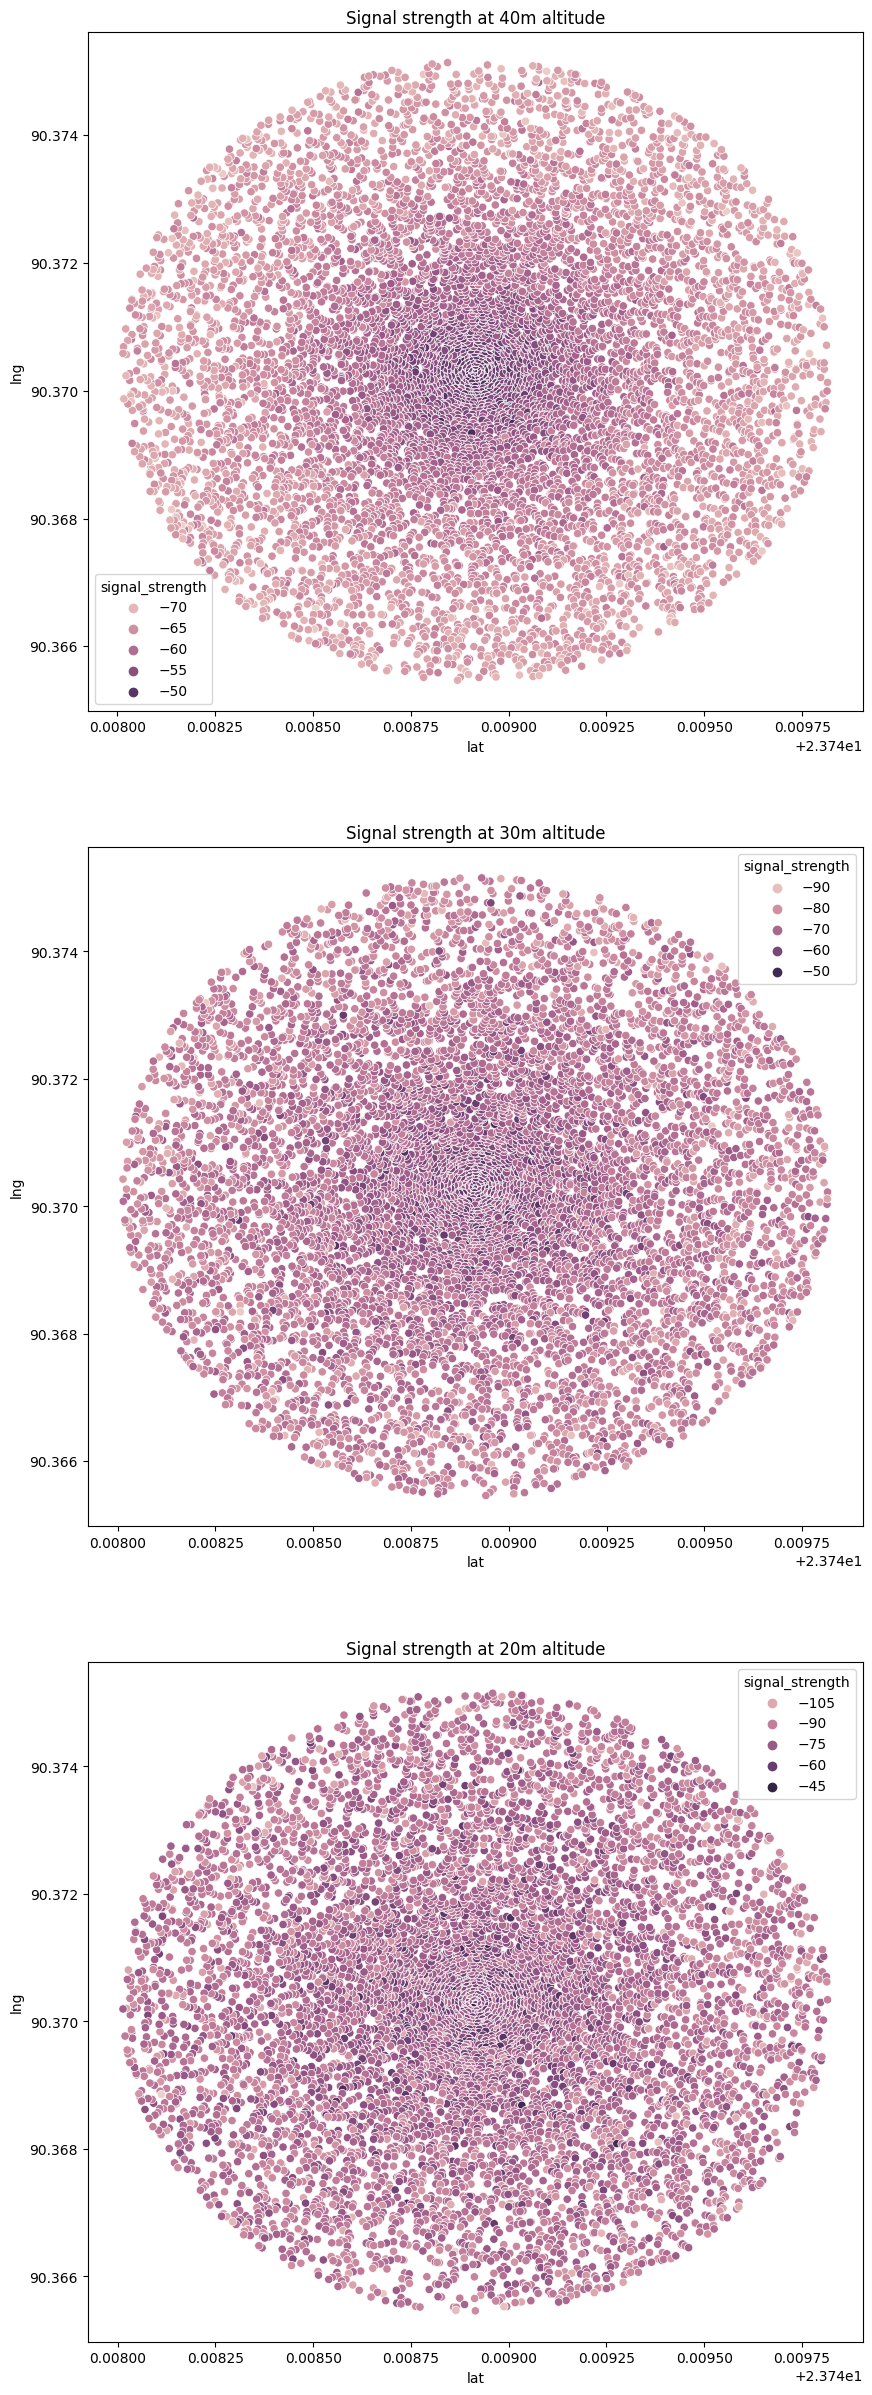

In [11]:
# Scatterplot

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1, figsize=(10, 30))

# Plot for 40m altitude, 30m altitude, and 20m altitude
sns.scatterplot(x=df40['lat'], y=df40['lng'], hue=df40['signal_strength'], ax=ax1)
ax1.set_title('Signal strength at 40m altitude')

sns.scatterplot(x=df30['lat'], y=df30['lng'], hue=df30['signal_strength'], ax=ax2)
ax2.set_title('Signal strength at 30m altitude')

sns.scatterplot(x=df20['lat'], y=df20['lng'], hue=df20['signal_strength'], ax=ax3)
ax3.set_title('Signal strength at 20m altitude')

Text(0.5, 1.0, 'Tower Distance Vs Signal strength at 20m altitude')

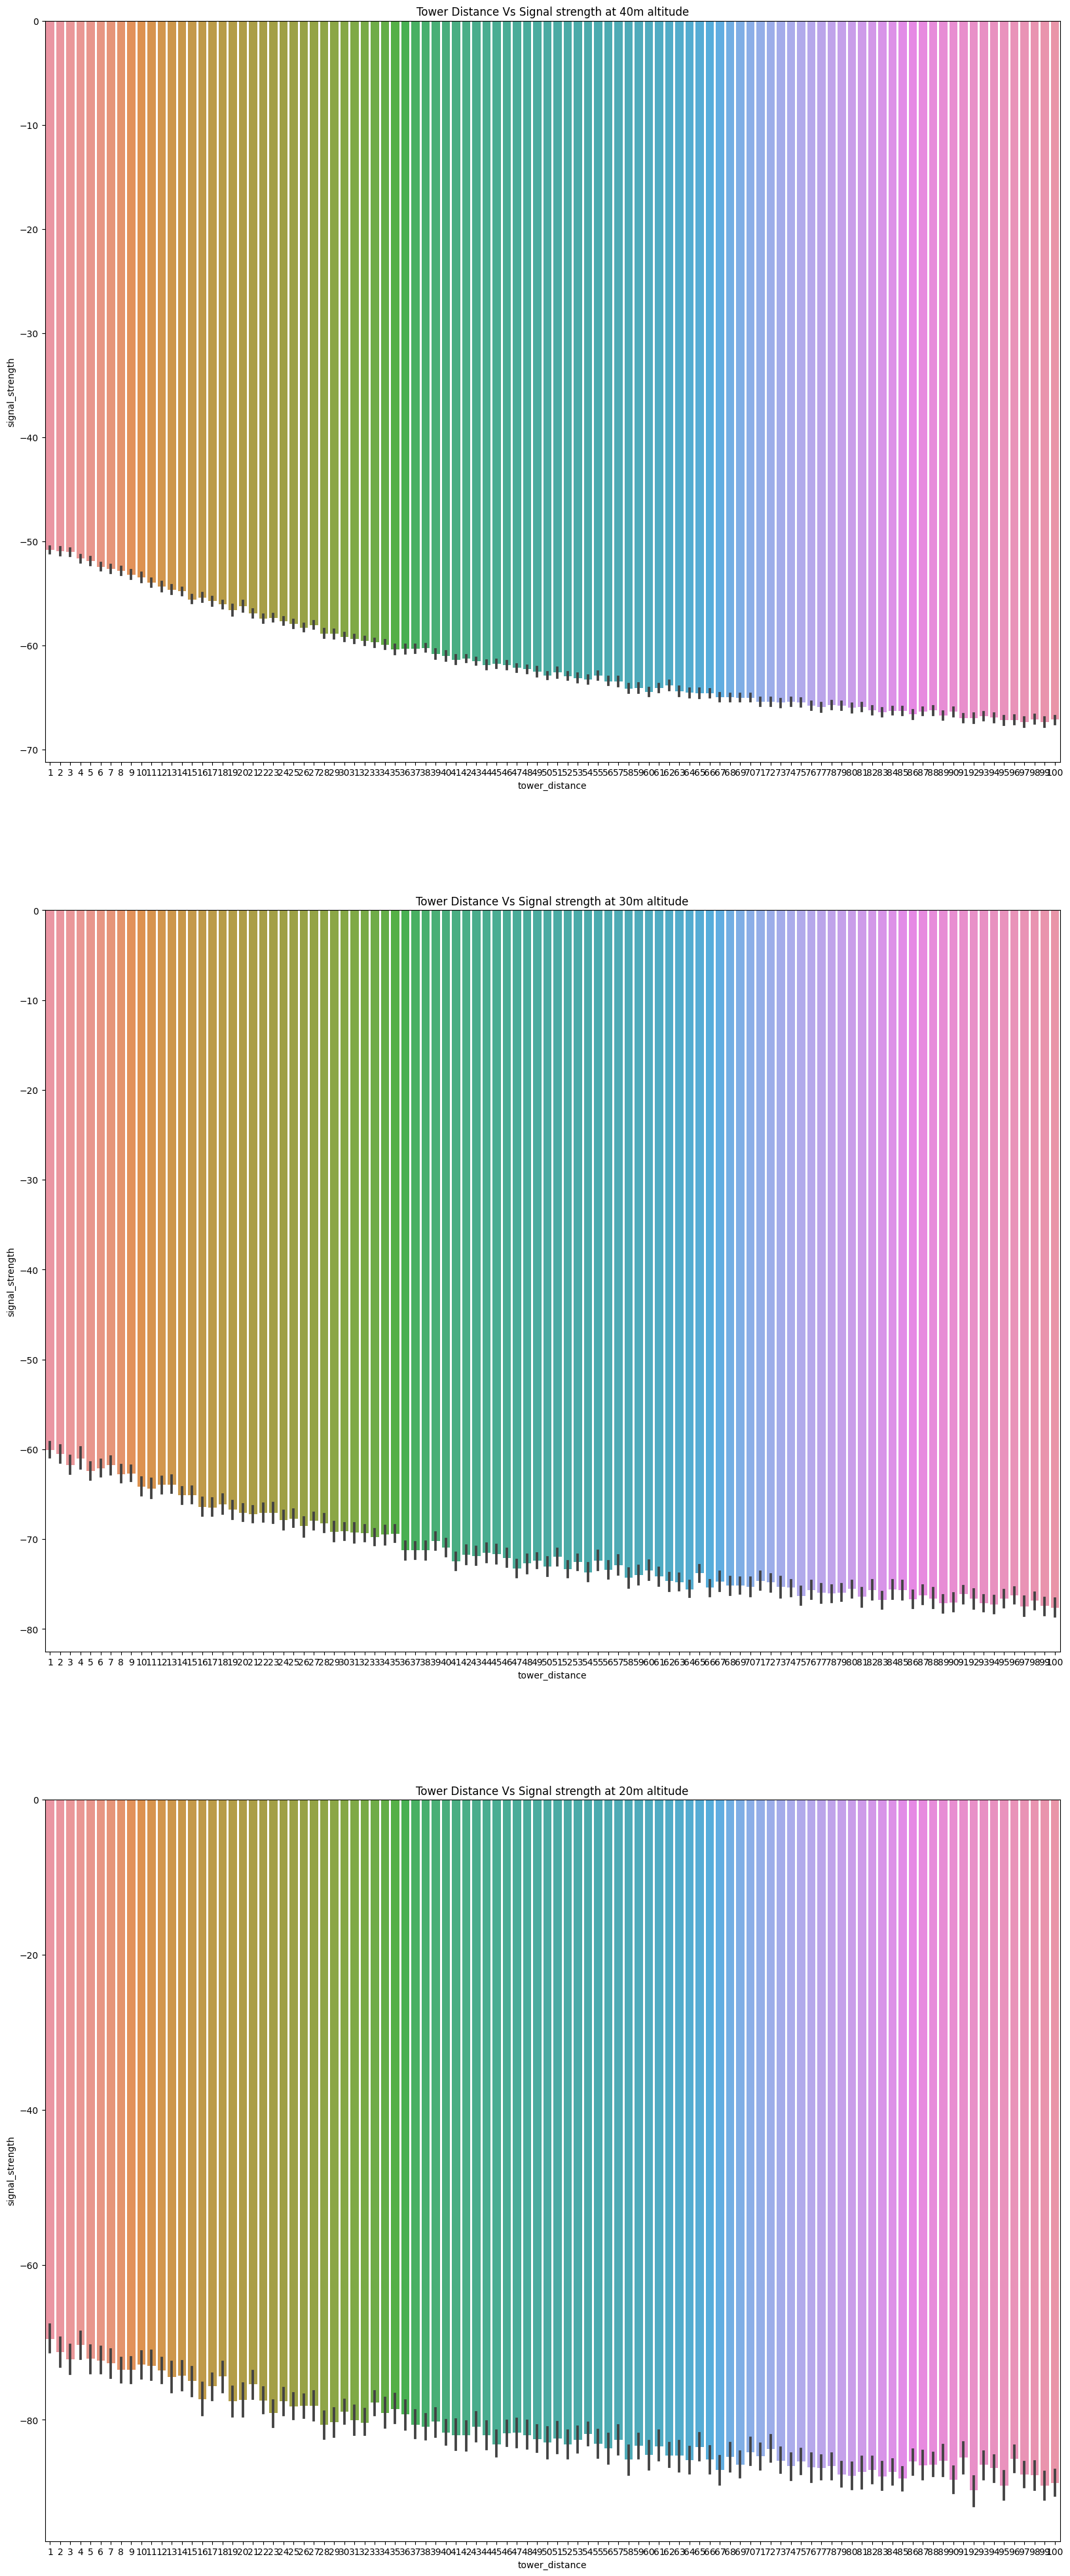

In [12]:
# Barplot

fig2, [axx1, axx2, axx3] = plt.subplots(nrows=3, ncols=1, figsize=(20, 50))

# sns.barplot(x=df60['tower_distance'], y=df60['signal_strength'], ax=axx1)
# axx1.set_title('Tower Distance Vs Signal strength at 60m altitude')

# sns.barplot(x=df50['tower_distance'], y=df50['signal_strength'], ax=axx2)
# axx2.set_title('Tower Distance Vs Signal strength at 50m altitude')

sns.barplot(x=df40['tower_distance'], y=df40['signal_strength'], ax=axx1)
axx1.set_title('Tower Distance Vs Signal strength at 40m altitude')

sns.barplot(x=df30['tower_distance'], y=df30['signal_strength'], ax=axx2)
axx2.set_title('Tower Distance Vs Signal strength at 30m altitude')

sns.barplot(x=df20['tower_distance'], y=df20['signal_strength'], ax=axx3)
axx3.set_title('Tower Distance Vs Signal strength at 20m altitude')

Text(0.5, 1.0, 'Signal strength at 10m tower distance')

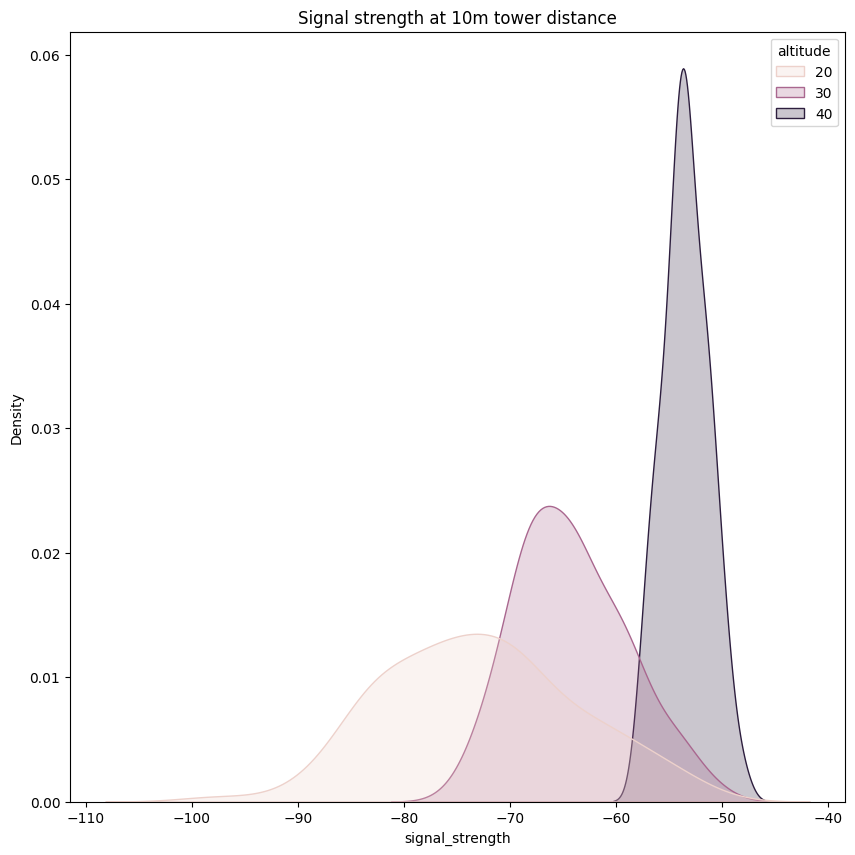

In [13]:
df_10 = df[df['tower_distance'] == 10]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_10, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 10m tower distance')

Text(0.5, 1.0, 'Signal strength at 20m tower distance')

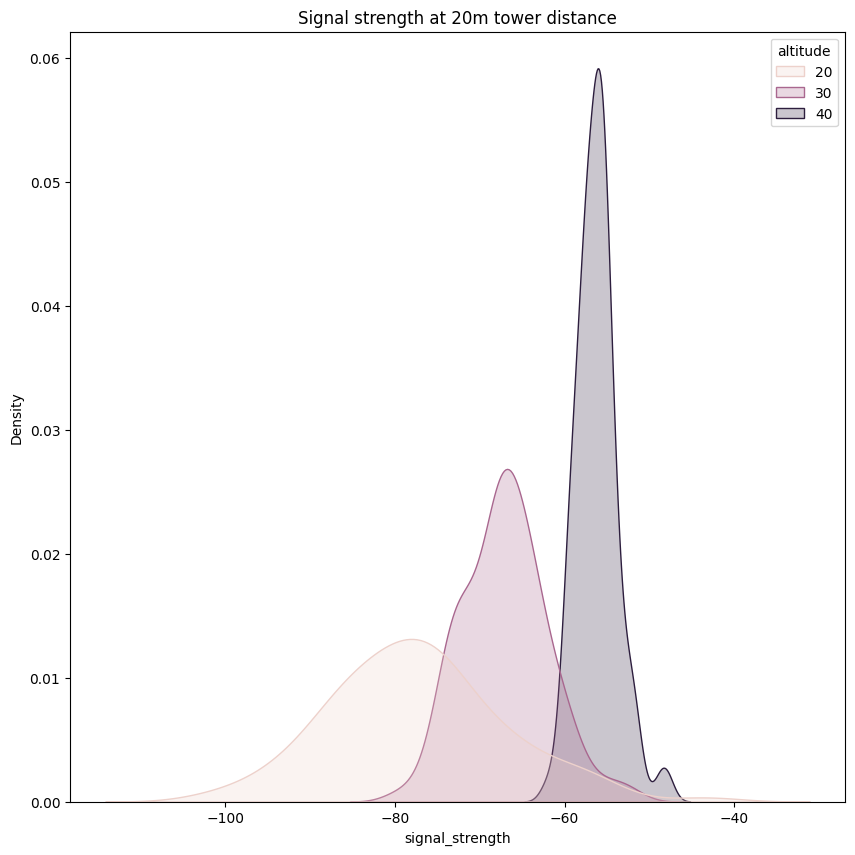

In [14]:
df_20 = df[df['tower_distance'] == 20]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_20, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 20m tower distance')

Text(0.5, 1.0, 'Signal strength at 30m tower distance')

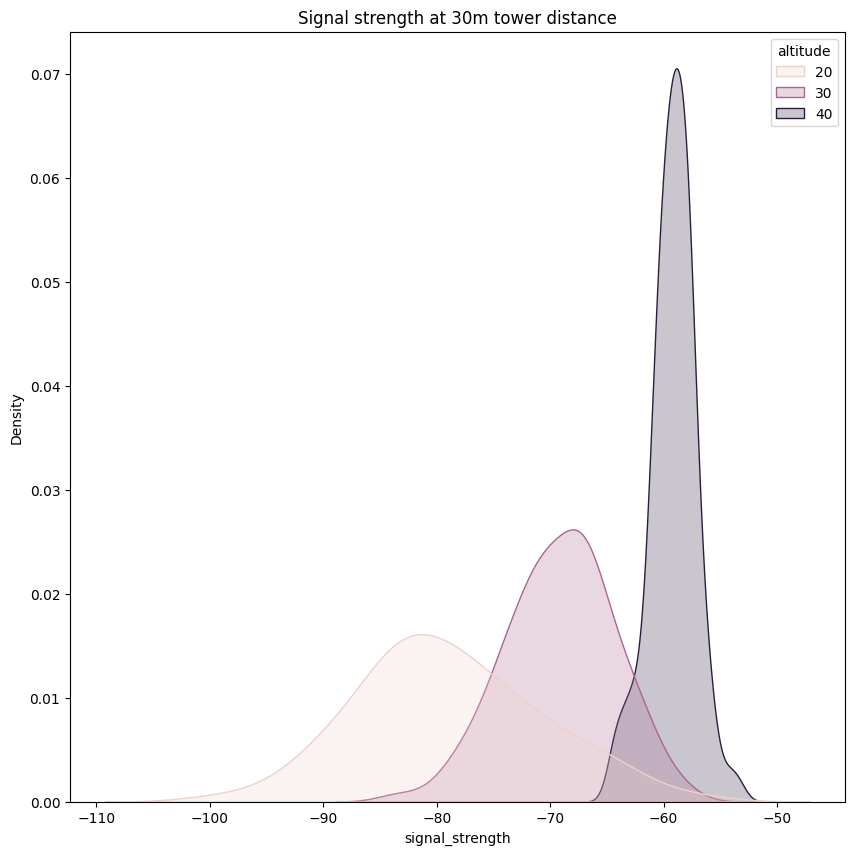

In [15]:
df_30 = df[df['tower_distance'] == 30]
plt.figure(figsize=(10, 10))
sns.kdeplot(data=df_30, x='signal_strength', hue='altitude', fill=True)
plt.title('Signal strength at 30m tower distance')

## Train a linear regression model

Epoch 1/250


2023-09-23 21:56:26.176741: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 21:56:26.199669: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 21:56:26.199833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

300/300 - 2s - loss: 2471.3083 - mean_absolute_error: 42.1688 - val_loss: 151.2564 - val_mean_absolute_error: 10.0092 - 2s/epoch - 6ms/step
Epoch 2/250
300/300 - 0s - loss: 109.1733 - mean_absolute_error: 8.4174 - val_loss: 84.7153 - val_mean_absolute_error: 7.2516 - 471ms/epoch - 2ms/step
Epoch 3/250
300/300 - 0s - loss: 61.9498 - mean_absolute_error: 6.0992 - val_loss: 55.4930 - val_mean_absolute_error: 5.5778 - 445ms/epoch - 1ms/step
Epoch 4/250
300/300 - 0s - loss: 45.1966 - mean_absolute_error: 5.0032 - val_loss: 46.8986 - val_mean_absolute_error: 4.9555 - 445ms/epoch - 1ms/step
Epoch 5/250
300/300 - 0s - loss: 40.0757 - mean_absolute_error: 4.5825 - val_loss: 43.8487 - val_mean_absolute_error: 4.6924 - 452ms/epoch - 2ms/step
Epoch 6/250
300/300 - 0s - loss: 38.1305 - mean_absolute_error: 4.4023 - val_loss: 42.5515 - val_mean_absolute_error: 4.5841 - 497ms/epoch - 2ms/step
Epoch 7/250
300/300 - 0s - loss: 37.3153 - mean_absolute_error: 4.3257 - val_loss: 42.0395 - val_mean_absolut

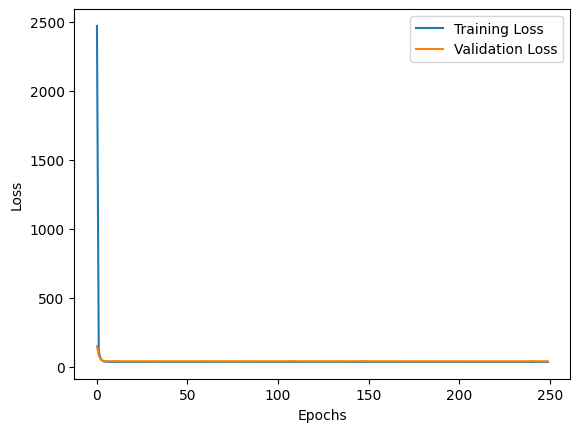

In [16]:
# Split the data into input, output
X = df[['tower_distance', 'altitude']].values
y = df['signal_strength'].values

# Split the data intto training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=250, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

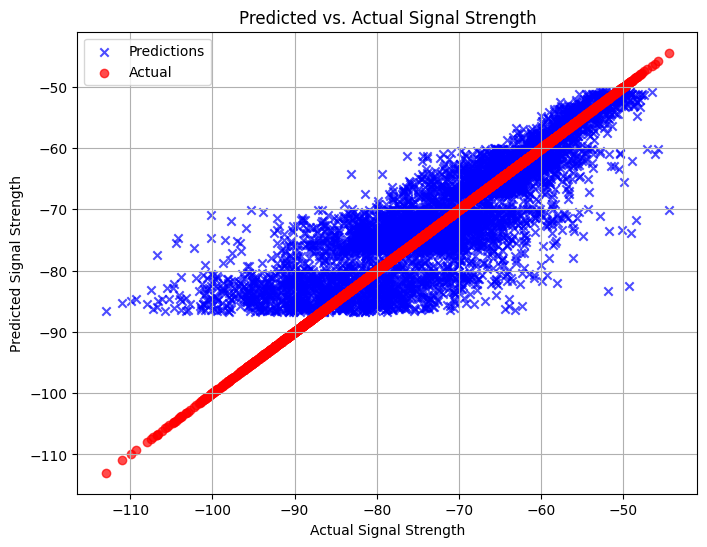

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, marker='x', color='blue', label='Predictions', alpha=0.7)
plt.scatter(y_test, y_test, marker='o', color='red', label='Actual', alpha=0.7)
plt.xlabel('Actual Signal Strength')
plt.ylabel('Predicted Signal Strength')
plt.title('Predicted vs. Actual Signal Strength')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Measure the accuracy of the model
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6985529495111762
